In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet18_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter,raps_imagenet_real_scatter,saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.0).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Before temperature - NLL: 1.304, ECE: 0.027
Optimal temperature: 0.985
After temperature - NLL: 1.304, ECE: 0.026


APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9689 ± 0.0011
Final Average Prediction Set Size: 30.99 ± 0.78
Final Average Coverage: 0.9489 ± 0.0019
Final Average Real Probability: 0.8952 ± 0.0028


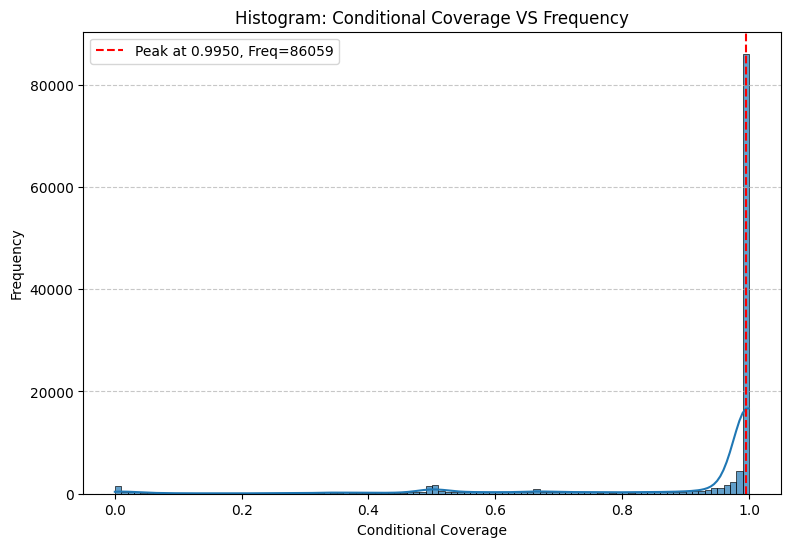

86059 (69.20%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0083 ± 0.0029
Final Average Prediction Set Size: 11.45 ± 0.24
Final Average Coverage: 0.9499 ± 0.0012
Final Average Real Probability: 0.8790 ± 0.0022


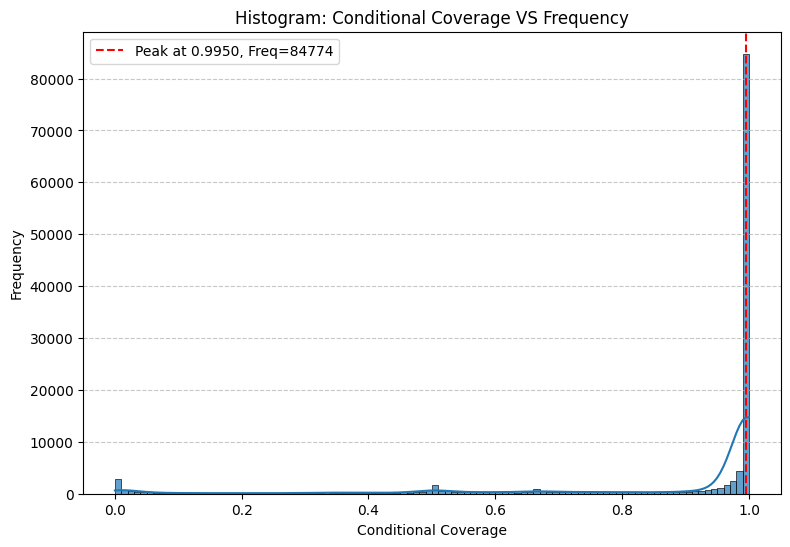

84774 (68.17%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.01, k_reg=7, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0163 ± 0.0055
Final Average Prediction Set Size: 11.14 ± 0.17
Final Average Coverage: 0.9492 ± 0.0018
Final Average Real Probability: 0.8838 ± 0.0030


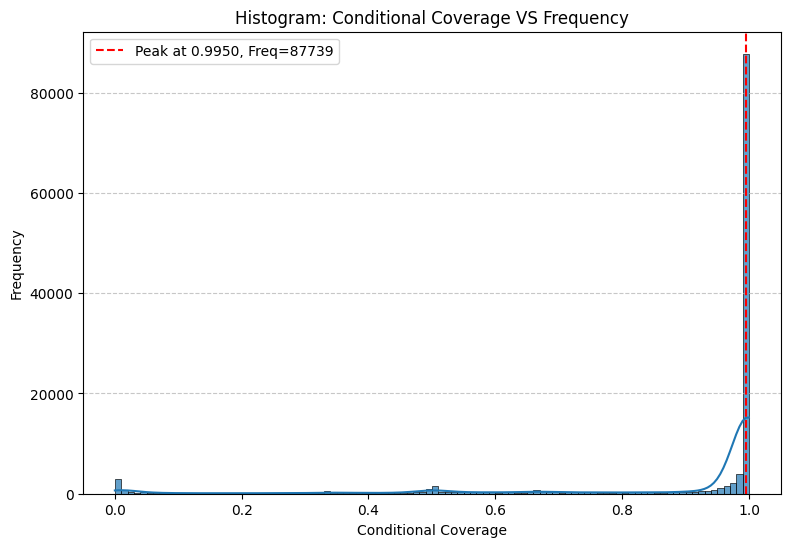

87739 (70.55%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.03, num_runs=10, alpha=0.05, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9689 ± 0.0010
Final Average Prediction Set Size: 31.80 ± 0.69
Final Average Coverage: 0.9496 ± 0.0018
Final Average Real Probability: 0.8972 ± 0.0026


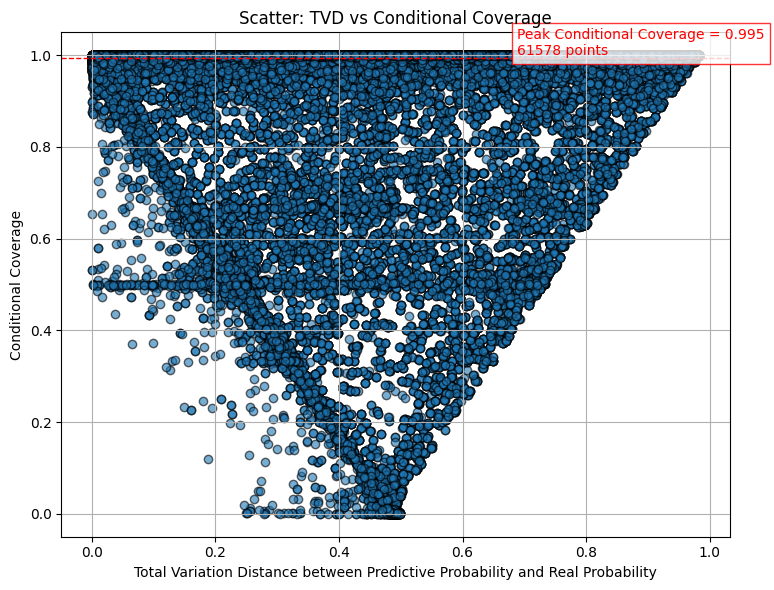

Peak Conditional Coverage = 0.995, with 61578 samples

=== Count Regions Summary ===
36553 (29.4%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
43400 (34.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
21602 (17.4%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.93303']
  Real Probability Set      : ['0.99946']
Sample 2:
  Predictive Probability Set: ['0.97076']
  Real Probability Set      : ['0.89478']
Sample 3:
  Predictive Probability Set: ['0.93455', '0.03778']
  Real Probability Set      : ['0.95961', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.49658', '0.47428']
  Real Probability Set      : ['0.02695', '0.04981']
Sample 2:
  Predictive Probability Set: ['0.67362']
  Real Probability Set      : ['0.00075']
Sample 3:
  Predictive Probability Set: ['0.97150']
  Real Probability Set      : ['0.00030

In [2]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0068 ± 0.0021
Final Average Prediction Set Size: 11.31 ± 0.12
Final Average Coverage: 0.9499 ± 0.0012
Final Average Real Probability: 0.8792 ± 0.0018


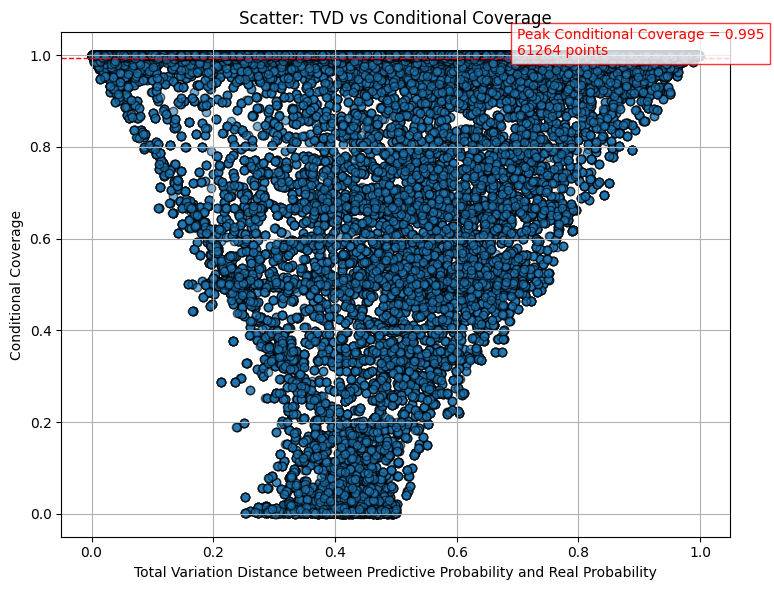

Peak Conditional Coverage = 0.995, with 61264 samples

=== Count Regions Summary ===
36005 (29.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
43241 (34.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
24012 (19.3%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.97462', '0.01009', '0.00454', '0.00148', '0.00094', '0.00089', '0.00087', '0.00062']
  Real Probability Set      : ['0.99721', '0.00093', '0.00093', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.92061', '0.03360', '0.01762', '0.01447', '0.00638', '0.00369', '0.00164']
  Real Probability Set      : ['0.98244', '0.01756', '0.00000', '0.00000', '0.00000', '0.00000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.93697', '0.02633', '0.01368', '0.00573', '0.00397', '0.00331', '0.00197', '0.00186']
  Real Probability Set      : ['0.91199', '0

In [3]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.01, k_reg=7, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 1.0133 ± 0.0039
Final Average Prediction Set Size: 11.04 ± 0.13
Final Average Coverage: 0.9494 ± 0.0014
Final Average Real Probability: 0.8844 ± 0.0025


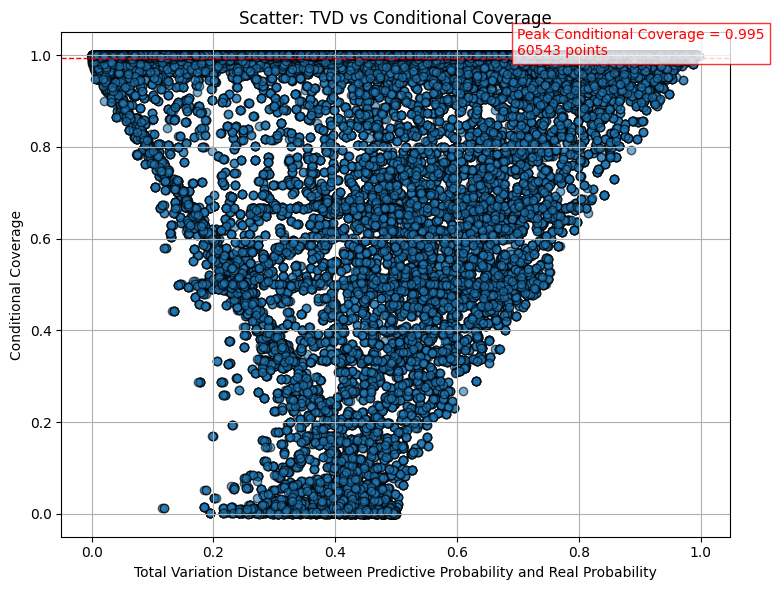

Peak Conditional Coverage = 0.995, with 60543 samples

=== Count Regions Summary ===
34817 (28.0%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
42134 (33.9%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
22647 (18.2%) samples in Count Region 3 [x:0-0.9, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.92109', '0.06463', '0.01081', '0.00129']
  Real Probability Set      : ['0.99944', '0.00028', '0.00028', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.96109', '0.01329', '0.00839']
  Real Probability Set      : ['0.88092', '0.00878', '0.00040']
Sample 3:
  Predictive Probability Set: ['0.94286', '0.01212', '0.00535', '0.00368']
  Real Probability Set      : ['0.97413', '0.00000', '0.00000', '0.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.69413', '0.06350', '0.05422', '0.01736', '0.00765', '0.00719', '0.00703', '0.00661', '0.00641', '0.0056

In [4]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.03, num_runs=10, alpha=0.05)